In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1:

(9 points)

We are working with an AR(1) model defined by the equation,
$$
    y_{t+1} = a \cdot y_{t} + \varepsilon_{t+1}, \quad \varepsilon_{t+1} \sim \mathcal{N}(0, \sigma^{2}),
$$
with initial distribution $y_{1} \sim \mathcal{N}(0, \sigma^2_0)$. Note that $\sigma^2_0$ and $\sigma^2$ are _different_ values.

**a)** Let $|a|<1$, __derive__ the __stationary__ distribution of this stochastic process.

_Hint: the distribution of $y_t$ will be Gaussian._

<div style="text-align: right"> (2p) </div>

**Solution:**

Stationary distributions, variance does not change over time, mean does not change over time

$$Var(y_{t+1}) = Var(ay_{t} + \varepsilon_{t+1})$$

$$Var(y_{t+1}) = a^2 Var(y_{t}) + Var(\varepsilon_{t+1})$$

$$Var(\varepsilon_{t+1}) = \sigma^2$$

$$Var(y_{t+1}) = Var(y_t) = \sigma_y^2$$

$$\sigma_y^2 = a^2  \sigma_y^2 +\sigma^2$$

$$\sigma_y^2 = \frac{\sigma^2}{1- a^2}$$


\


$$E[y_{t+1}] = a E[(y_{t}] + E[\varepsilon_{t+1}]$$

$$E[\varepsilon_{t+1}] = 0$$

$$E[y_{t+1}] = E[(y_{t}] = \mu$$

$$\mu = a\mu$$

$$\mu(1-0) = 0 \text{  ->  } \mu = 0 \text{ since  |a| < 1}$$

\

$$
y_t \sim N \left(0, \frac{\sigma^2}{1- a^2}\right)
$$


----

**b)** Simulate 2000 time-steps of two different AR(1) processes, one using $a = 0.9$ and the other one using $a = -0.9$. For both chains set $\sigma^2 = 0.5$ and $\sigma^2_0$ to the variance of the stationary distribution you found in **a)**.

Plot both of these chains, does it look like the samples come from the stationary distirbution?
Plot the empirical autocorrelation function of the two time-series, describe the differences that you see.

_hint: you can use `acfplot` from `tssltools.py`_

<div style="text-align: right"> (4p) </div>

**Solution:**

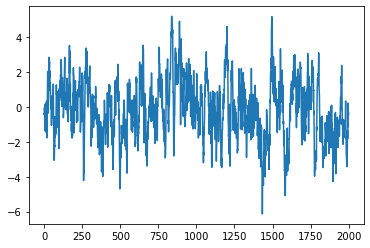

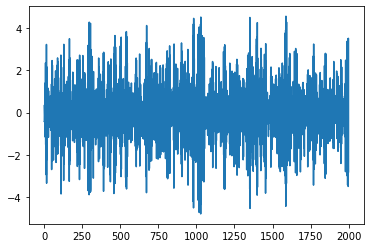

In [17]:
from tssltools import acfplot

a1 = 0.9
a2 = -0.9
sigma2 = 0.5
sigma2_0 = sigma2 / (1 - a1**2)


def sim_ar1(a, sigma2, n, sigma2_0):
    y = np.zeros(n)
    y[0] = np.random.normal(0, np.sqrt(sigma2_0))
    for t in range(1, n):
        y[t] = a * y[t-1] + np.random.normal(0, np.sqrt(sigma2))
    return y

chain1 = sim_ar1(0.9, 0.5, 2000, sigma2_0)
chain2 = sim_ar1(-0.9, 0.5, 2000, sigma2_0)


plt.plot(chain1)
plt.show()


plt.plot(chain2)
plt.show()

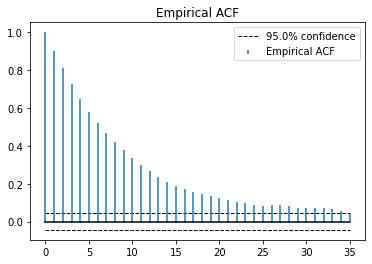

In [18]:
acfplot(chain1, lags = 35)

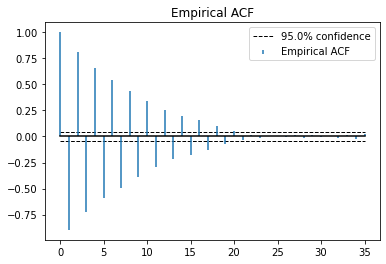

In [19]:
acfplot(chain2, lags = 35)

---

When plotting y for both of the chain it seems that they are coming from a stationary distribution because it
is around 0.

Comparing ACF-plot, a = 0.9 slowlys decays, indication a strong correlation between current and previos value.
a = -0.9 alternates between + and - but decays faster

**c)** Once again we are going to study the two chains with $a=0.9$ and $a=-0.9$. This time start the chains with $y_1 = 10$ and study the behaviour of the chains until they reach stationarity. Is there any difference in the speed and behaviour of the transition of the two stochastic process.
<div style="text-align: right"> (3p) </div>

**Solution:**

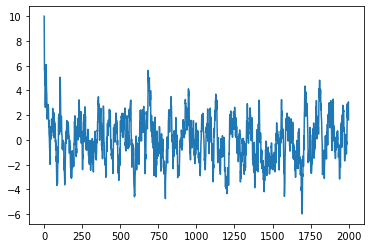

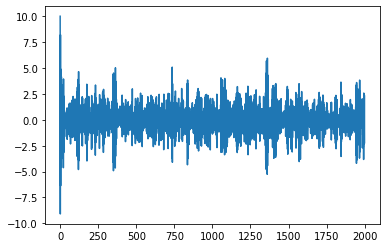

In [20]:
from tssltools import acfplot

a1 = 0.9
a2 = -0.9
sigma2 = 0.5
sigma2_0 = sigma2 / (1 - a1**2)


def sim_ar1(a, sigma2, n, sigma2_0):
    y = np.zeros(n)
    y[0] = 10
    for t in range(1, n):
        y[t] = a * y[t-1] + np.random.normal(0, np.sqrt(sigma2))
    return y

chain1 = sim_ar1(0.9, 0.5, 2000, sigma2_0)
chain2 = sim_ar1(-0.9, 0.5, 2000, sigma2_0)


plt.plot(chain1)
plt.show()


plt.plot(chain2)
plt.show()

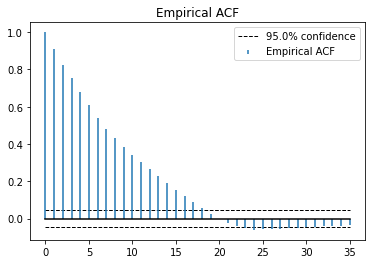

In [21]:
acfplot(chain1, lags = 35)

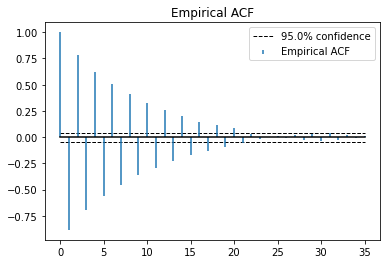

In [22]:
acfplot(chain2, lags = 35)